<a href="https://colab.research.google.com/github/antoniogss/air_quality/blob/main/db_inmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files #Upload files into the notebook
from glob import glob
from datetime import date, time, datetime, timedelta
from functools import reduce
from matplotlib import dates, rcParams
from datetime import date, time, datetime, timedelta

war.filterwarnings('ignore')

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Downloading files

In [ ]:
%cd ./gdrive/MyDrive/air_quality/datasets/inmet/

/content/gdrive/MyDrive/air_quality/datasets/inmet


In [ ]:
# files.upload()
# gc.output.clear()

!echo "Number of uploaded files:" 
%ll *.csv | wc -l
!echo -e "\n"

!echo "Total number of lines in multiple files:"
!cat *.csv | wc -l

Number of uploaded files:
2


Total number of lines in multiple files:
3789


#Removing headers

In [ ]:
# !sed -i '1,10d' *.csv 

#Load the csv file into a DF

##Daily Mean

In [ ]:
inmet_dia = pd.read_csv(  "./inmet_dia.csv", 
                          sep = ';', 
                          header = None, 
                          error_bad_lines = False,
                          encoding='latin-1'
)

#make second row header in pandas
new_header = inmet_dia.iloc[0] #grab the first row for the header
inmet_dia = inmet_dia[1:] #take the data less the header row
inmet_dia.columns = new_header #set the header row as the df header
inmet_dia.rename(columns=inmet_dia.iloc[0])

# Drop last column of a dataframe
inmet_dia = inmet_dia.iloc[: , :-1]

# inmet_dia.head()

##Monthly Mean

In [ ]:
inmet_mes = pd.read_csv(  "./inmet_mes.csv", 
                          sep = ';', 
                          header = None, 
                          error_bad_lines = False,
                          encoding='latin-1'
)

#make second row header in pandas
new_header = inmet_mes.iloc[0] #grab the first row for the header
inmet_mes = inmet_mes[1:] #take the data less the header row
inmet_mes.columns = new_header #set the header row as the df header
inmet_mes.rename(columns=inmet_mes.iloc[0])

# Drop last column of a dataframe
inmet_mes = inmet_mes.iloc[: , :-1]

# inmet_mes.head()

#Mapping NaN values

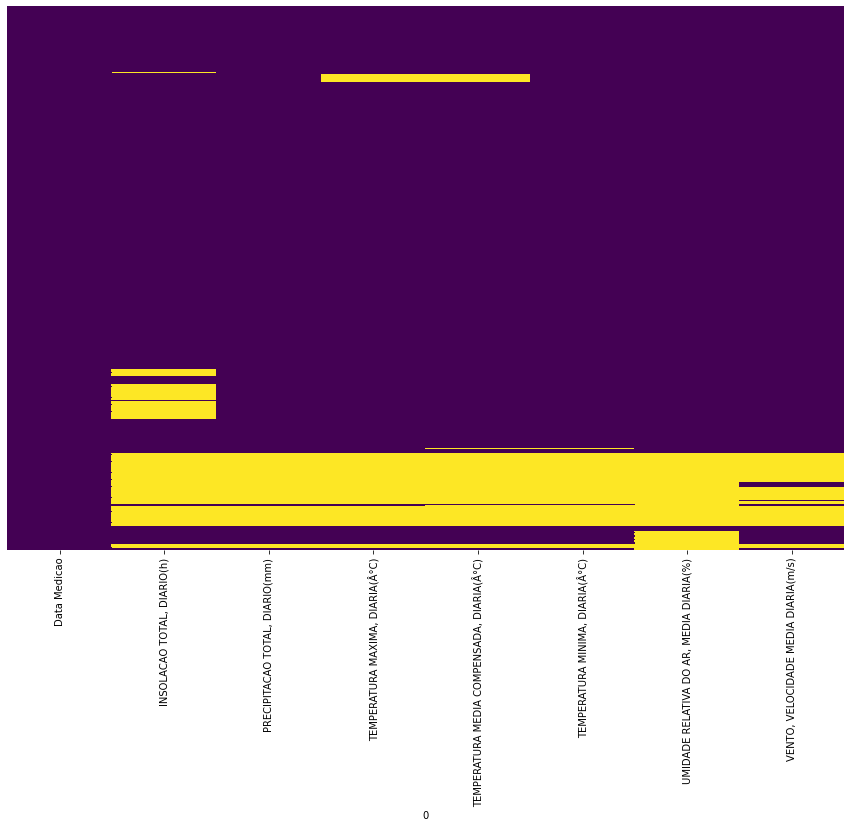

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(inmet_dia.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            ax=ax
          );

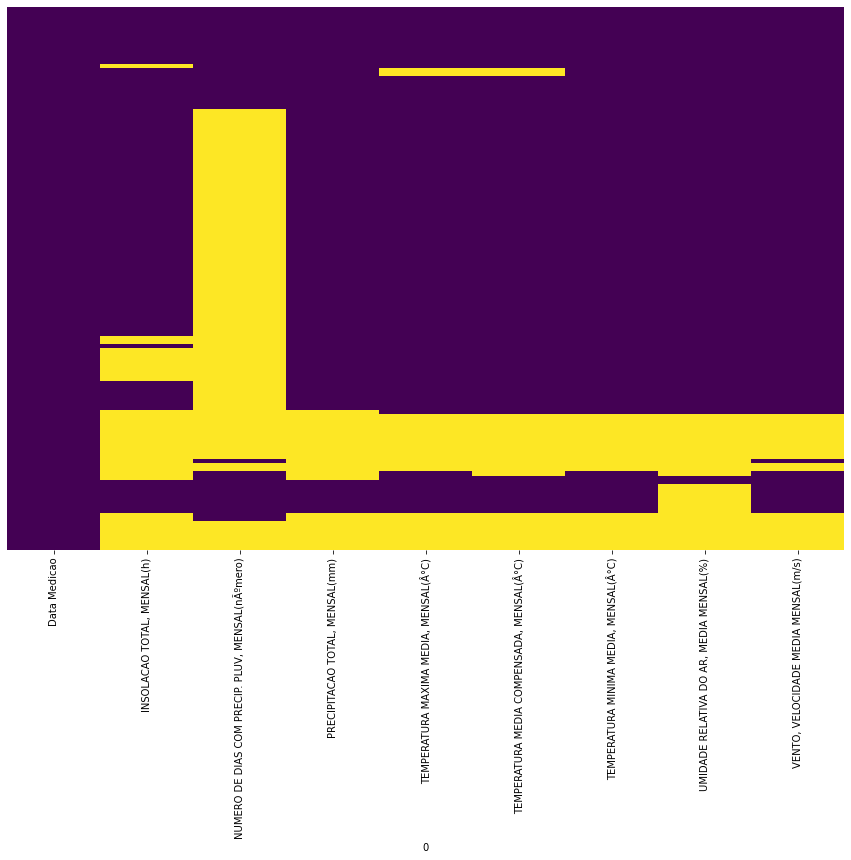

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(inmet_mes.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            ax=ax
           );

#Changing commas to dot

In [ ]:
inmet_dia = inmet_dia.replace({',' : '.'}, regex = True)

inmet_mes = inmet_mes.replace({',' : '.'}, regex = True)

#Converting string to float

In [ ]:
#Convert all float columns in dataframe but except the first column
cols = inmet_dia.columns
inmet_dia[cols[1:]] = inmet_dia[cols[1:]].apply(pd.to_numeric, errors='coerce')

cols = inmet_mes.columns
inmet_mes[cols[1:]] = inmet_mes[cols[1:]].apply(pd.to_numeric, errors='coerce')

# print(inmet_dia.dtypes, inmet_mes.dtypes)

#Formatting dates and times

In [ ]:
inmet_dia['Data Medicao'] = pd.to_datetime(inmet_dia['Data Medicao'])
inmet_mes['Data Medicao'] = pd.to_datetime(inmet_mes['Data Medicao'])

#Adding the column  days of the week

In [ ]:
dias_ptbr = {
              'Sunday':'Domingo', 
              'Monday':'Segunda-feira', 
              'Tuesday':'Terça-feira', 
              'Wednesday':'Quarta-feira', 
              'Thursday':'Quinta-feira', 
              'Friday':'Sexta-feira', 
              'Saturday':'Sábado'
}

inmet_dia['dia_da_semana'] = inmet_dia['Data Medicao'].dt.day_name().replace(dias_ptbr)
# inmet_dia.head()

#Adding the column month

In [ ]:
mes_ptbr = {'January':'Janeiro', 
             'February':'Fevereiro', 
             'March':'Março', 
             'April':'Abril', 
             'May':'Maio', 
             'June':'Junho', 
             'July':'Julho',
             'August':'Agosto', 
             'September':'Setembro',
             'October':'Outubro', 
             'November':'Novembro',
             'December':'Dezembro'}

inmet_mes['mes'] = inmet_mes['Data Medicao'].dt.month_name().replace(mes_ptbr)
# inmet_mes.head()

#Renaming columns

In [ ]:
inmet_dia.columns

Index(['Data Medicao', 'INSOLACAO TOTAL, DIARIO(h)',
       'PRECIPITACAO TOTAL, DIARIO(mm)', 'TEMPERATURA MAXIMA, DIARIA(Â°C)',
       'TEMPERATURA MEDIA COMPENSADA, DIARIA(Â°C)',
       'TEMPERATURA MINIMA, DIARIA(Â°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)',
       'VENTO, VELOCIDADE MEDIA DIARIA(m/s)', 'dia_da_semana'],
      dtype='object', name=0)

In [ ]:
inmet_dia.rename(
                  columns = {
                              'Data Medicao':'data', 
                              'INSOLACAO TOTAL, DIARIO(h)':'insolacao_total',
                              'PRECIPITACAO TOTAL, DIARIO(mm)':'ppt_total',
                              'TEMPERATURA MAXIMA, DIARIA(Â°C)':'temp_max',
                              'TEMPERATURA MEDIA COMPENSADA, DIARIA(Â°C)':'temp_med',
                              'TEMPERATURA MINIMA, DIARIA(Â°C)':'temp_min',
                              'UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)':'umid_rel_med',
                              'VENTO, VELOCIDADE MEDIA DIARIA(m/s)':'vel_vento_med'
                            },
                  inplace = True
                )

# inmet_dia.head()

In [ ]:
inmet_mes.columns

Index(['Data Medicao', 'INSOLACAO TOTAL, MENSAL(h)',
       'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL(nÃºmero)',
       'PRECIPITACAO TOTAL, MENSAL(mm)',
       'TEMPERATURA MAXIMA MEDIA, MENSAL(Â°C)',
       'TEMPERATURA MEDIA COMPENSADA, MENSAL(Â°C)',
       'TEMPERATURA MINIMA MEDIA, MENSAL(Â°C)',
       'UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)',
       'VENTO, VELOCIDADE MEDIA MENSAL(m/s)', 'mes'],
      dtype='object', name=0)

In [ ]:
inmet_mes.rename(
                  columns = {
                              'Data Medicao':'data', 
                              'INSOLACAO TOTAL, MENSAL(h)':'insolacao_total',
                              'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL(nÃºmero)':'num_dias_ppt',
                              'PRECIPITACAO TOTAL, MENSAL(mm)':'ppt_total',
                              'TEMPERATURA MAXIMA MEDIA, MENSAL(Â°C)':'temp_max',
                              'TEMPERATURA MEDIA COMPENSADA, MENSAL(Â°C)':'temp_med',
                              'TEMPERATURA MINIMA MEDIA, MENSAL(Â°C)':'temp_min',
                              'UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)':'umid_rel_med',
                              'VENTO, VELOCIDADE MEDIA MENSAL(m/s)':'vel_vento_med'
                            },
                  inplace = True
                )

# inmet_mes.head()

#Download

In [ ]:
%cd ..
%cd ./created_datasets/

/content/gdrive/MyDrive/air_quality/datasets
/content/gdrive/MyDrive/air_quality/datasets/created_datasets


In [ ]:
inmet_dia.to_csv('./inmet_dia.csv')
inmet_mes.to_csv('./inmet_mes.csv')